In [1]:
library(tidyverse)
library(plotly)
library(BSDA)
library(MASS)
library(AID)
library(car)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config


Loading required package: lattice


Attaching package: ‘BSDA’


The following object is masked from ‘package:datasets’:

    Orange



Attaching package: ‘MASS’


The following object is masked from ‘package:plotly’:

    select


The following object is masked from ‘package:dplyr’:

    select


Regis

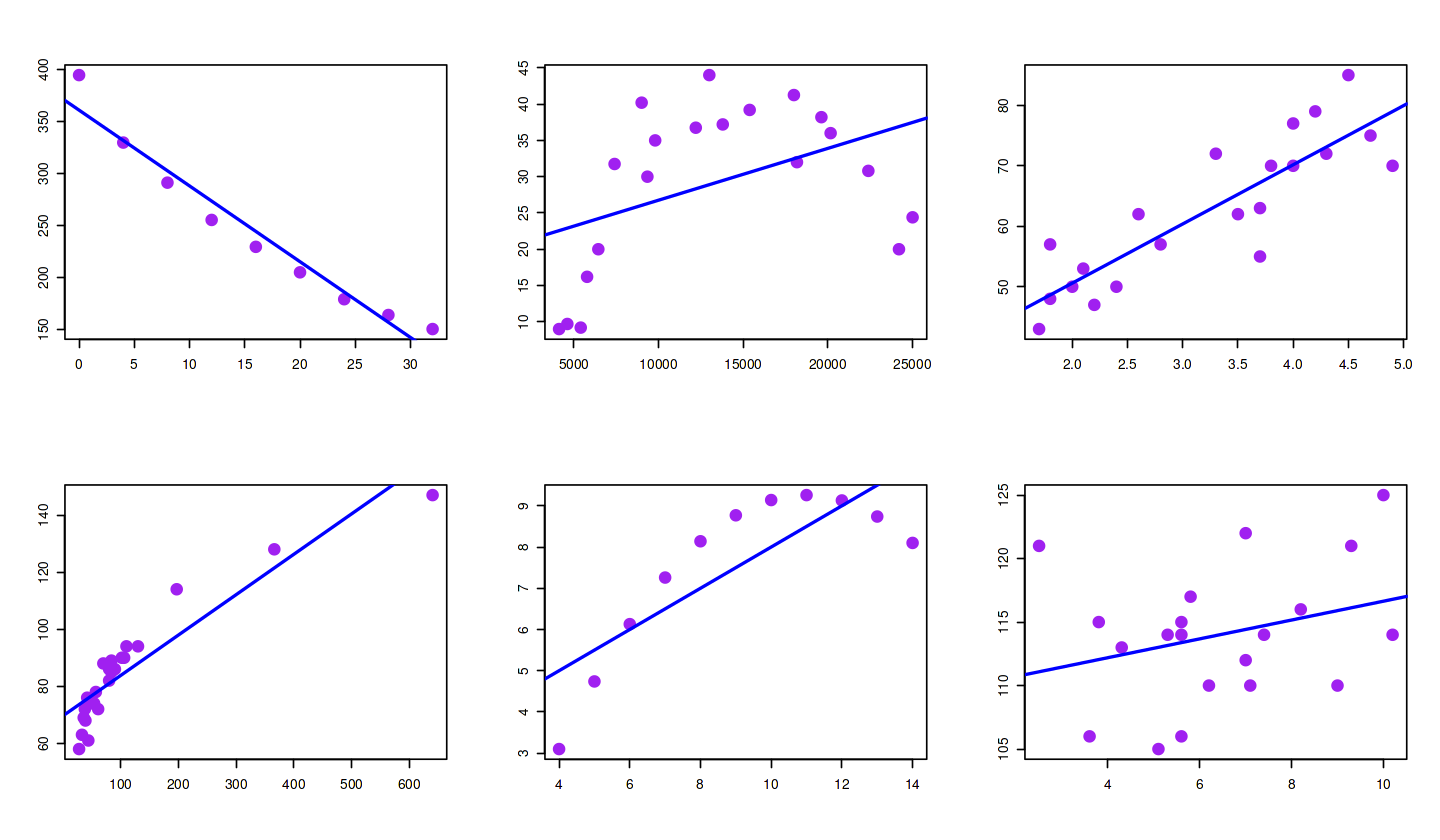

In [2]:
fPlot = function (path2 = 'treadwear.txt', i=2, j=1){
    
    path1 = "/kaggle/input/stat501/STAT501_Lesson04"
    df = read.delim(paste(path1, path2, sep="/"), sep="")
    
    name = colnames(df)
    rumus = paste(name[i], "~", name[j])

    plot(df[,j], df[,i], xlab="", ylab="", pch=20, col="purple", cex=2.5)
    abline(lm(rumus, df), col="blue", lwd=2)
}

path2 = c("treadwear.txt", "incomebirth.txt", "oldfaithful.txt", "alligator.txt")

op = options(repr.plot.width=12, repr.plot.height=7)

par(mfrow=c(2,3))

for (k in path2) fPlot(k)

fPlot("anscombe.txt", 4, 3)
fPlot("bloodpress.txt", 2, 6)

options(op)

In [3]:

# main2 = "/kaggle/input/stat501/STAT501_Lesson04"
# m2 = dir(main2)

# for (i in 1:19){
#     if (i %in% c(3, 9, 14)) next
#     df = read.delim(paste(main2, m2[i], sep="/"), sep="")
    
# #     print(head(df))
#     if (i != 11 & i != 16) {
#         scatterplotMatrix(sapply(df, as.numeric), 
#                           smooth=F, pch=20, main=m2[i])        
#     } else {
#         scatterplotMatrix(sapply(df[,-1], as.numeric), 
#                           smooth=F, pch=20, main=m2[i])
#     }
# }

In [4]:
# main = "/kaggle/input/stat501/STAT501_data/STAT501_Lesson01"
# m = dir(main)

# for (i in 1:length(m)){
#     df = read.delim(paste(main, m[i], sep="/"))
# #     print(head(df)) #10, 13
#     if (i != 10 & i != 13) {
#         scatterplotMatrix(sapply(df, as.numeric), 
#                           smooth=F, pch=20, main=m[i])        
#     } else {
#         scatterplotMatrix(sapply(df[,-1], as.numeric), 
#                           smooth=F, pch=20, main=m[i])
#     }
# }

In [5]:
library(car)

,age,FEV,ht,sex,smoke
,<int>,<dbl>,<dbl>,<int>,<int>
1,9,1.708,57.0,0,0
2,8,1.724,67.5,0,0
3,7,1.720,54.5,0,0
4,9,1.558,53.0,1,0
5,9,1.895,57.0,1,0
6,8,2.336,61.0,0,0


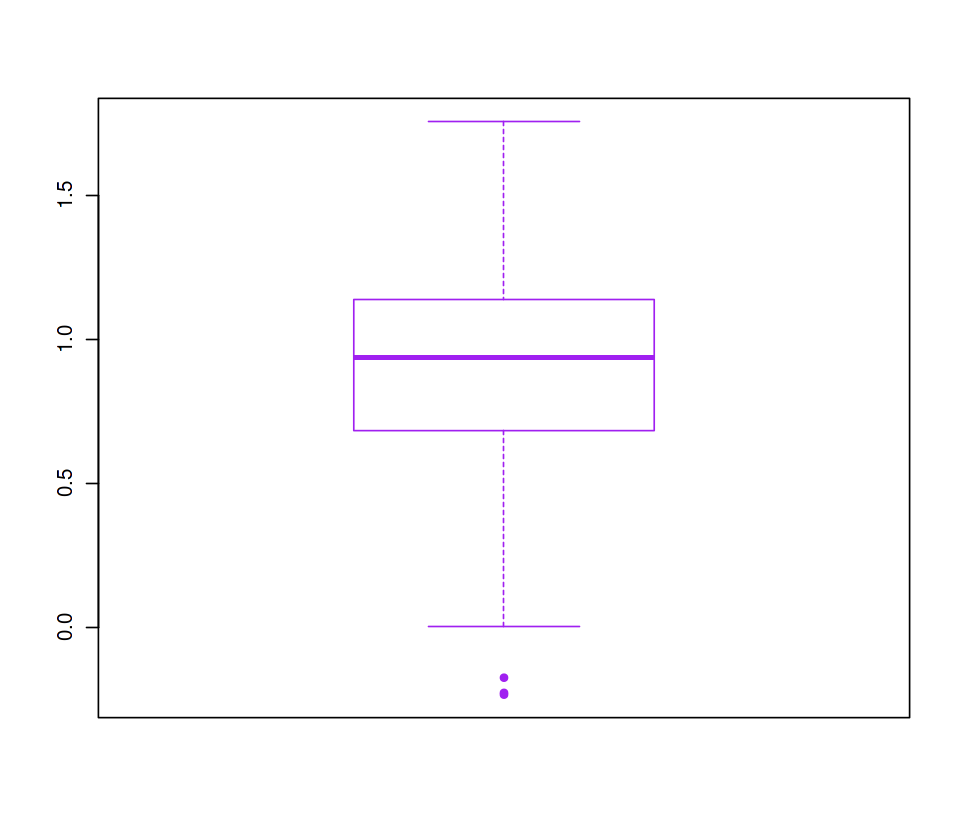

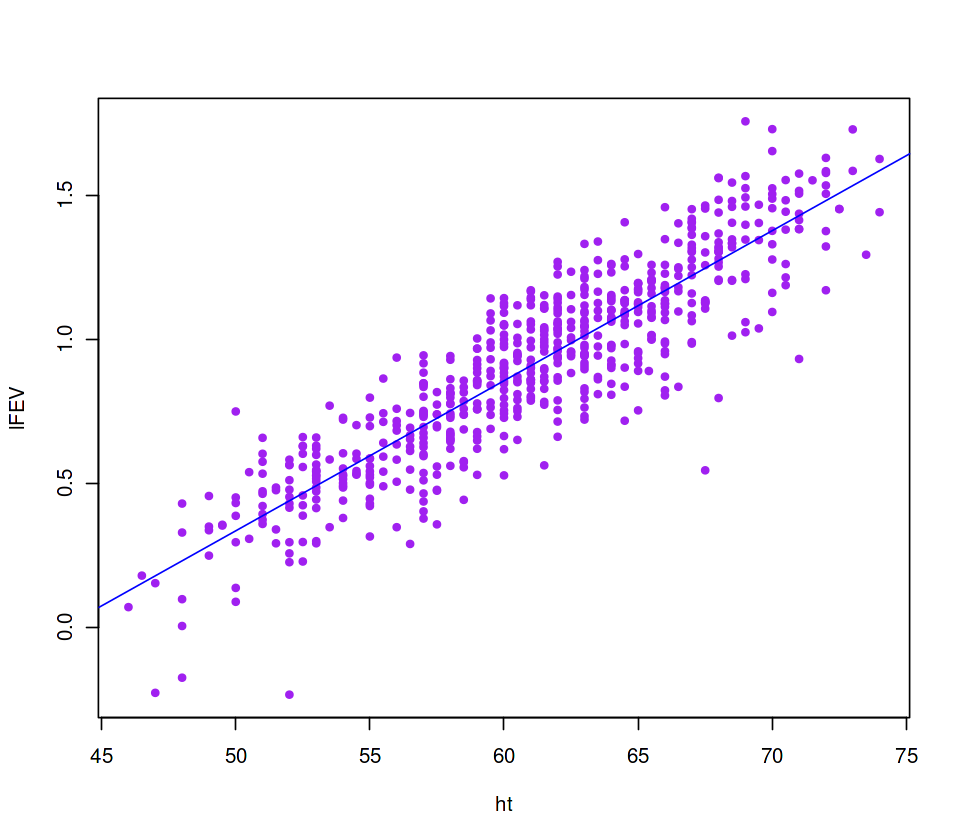

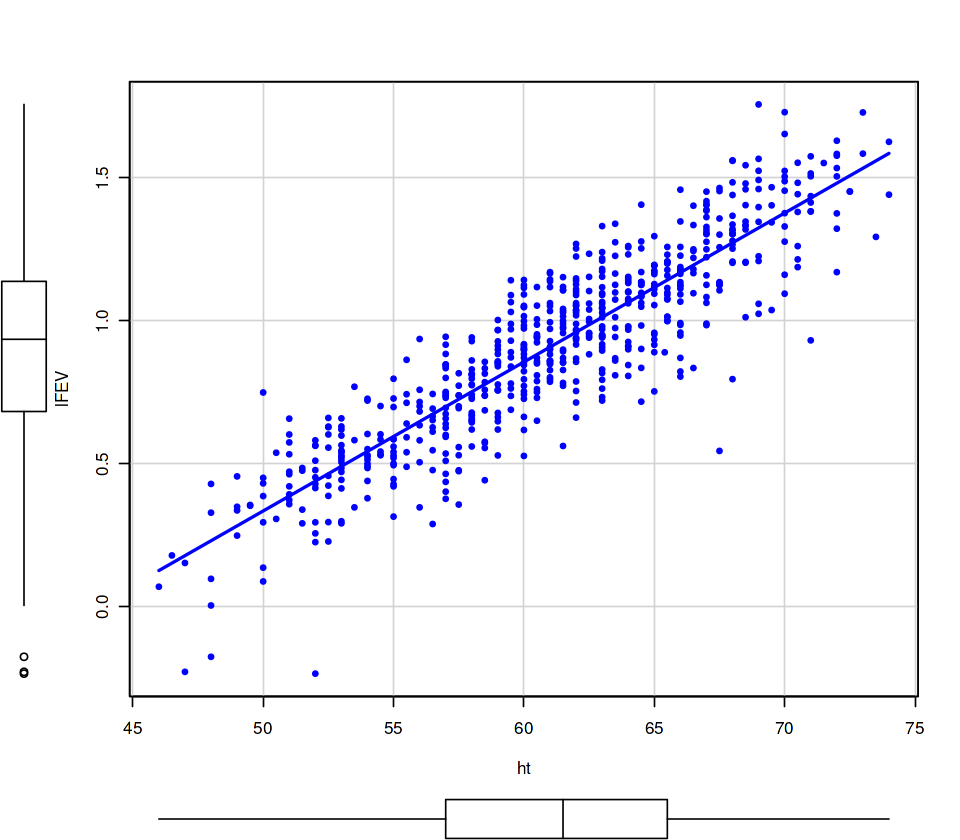

In [6]:
df1 = read.delim("/kaggle/input/stat501/STAT501_data/STAT501_Lesson01/fev_dat.txt")
head(df1)

# lakukan transformasi sesuai yang diminta
df2 = df1
df2$lFEV = log(df2$FEV)

options(repr.plot.width=8, repr.plor.length=8)

# normalitas
boxplot(df2$lFEV, border="purple", col="white", pch=20)

# linearitas
plot(lFEV~ht, df2, col="purple", pch=20)
abline(lm(lFEV~ht, df2), col="blue")

# or
scatterplot(lFEV~ht, df2, smooth=F, pch=20)

In [7]:
# model and summary
lm1 = lm(formula=lFEV~ht, data=df2)
summary(lm1)


Call:
lm(formula = lFEV ~ ht, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70208 -0.08986  0.01190  0.09337  0.43174 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.271312   0.063531  -35.75   <2e-16 ***
ht           0.052119   0.001035   50.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1508 on 652 degrees of freedom
Multiple R-squared:  0.7956,	Adjusted R-squared:  0.7953 
F-statistic:  2538 on 1 and 652 DF,  p-value: < 2.2e-16


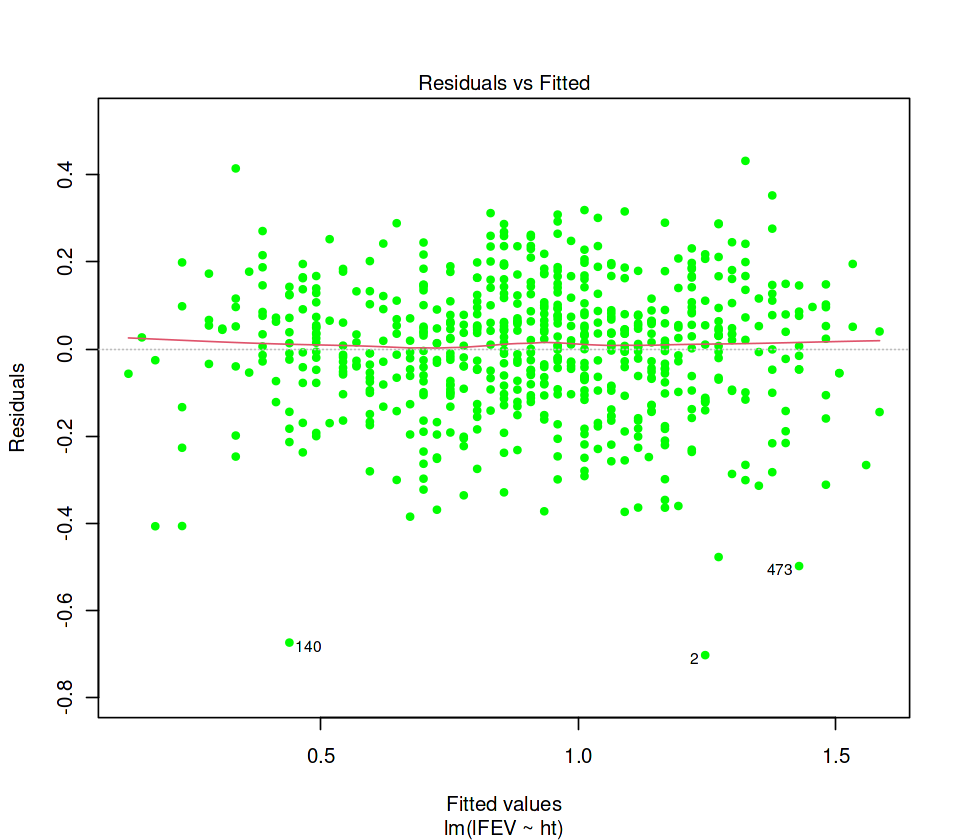

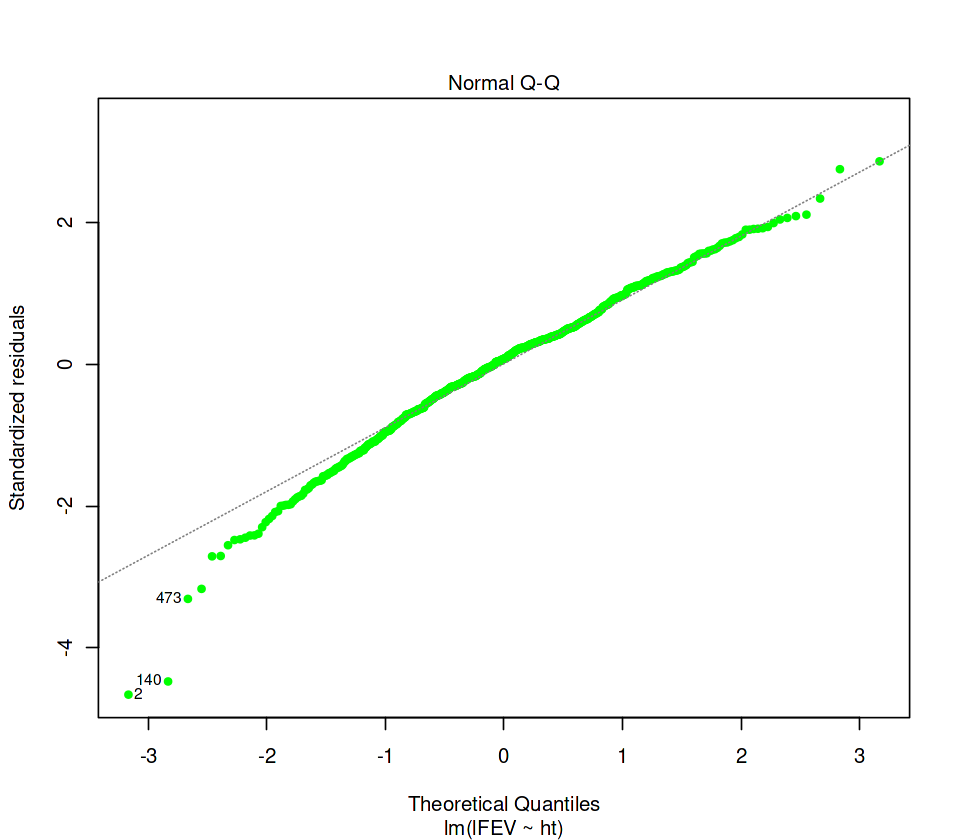

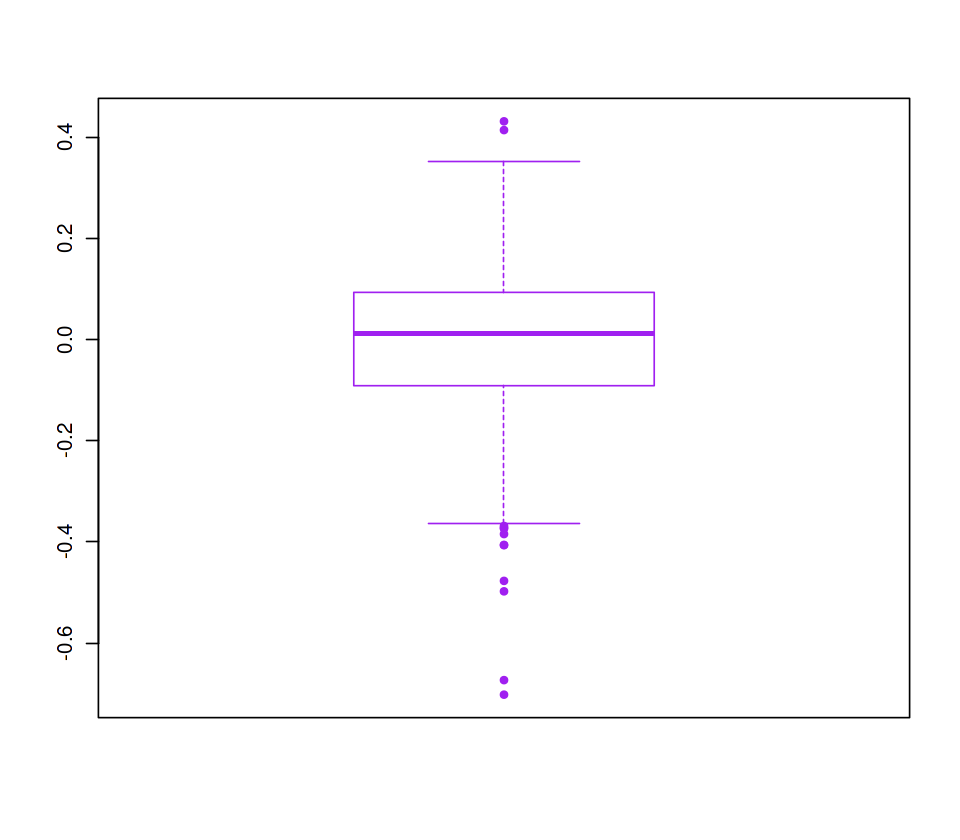

In [8]:
# linearitas dan kesamaan variansi
plot(lm1, which=1, pch=20, col="green")

# normalitas
plot(lm1, which=2, pch=20, col="green")
boxplot(lm1$residual, col="white", border="purple", pch=20)

In [9]:
# # read data, drop index columns [,-1]
# df = read.delim("/kaggle/input/stat501/STAT501_Lesson01/bldgstories.txt")

# scatterplotMatrix(df, smooth=F, pch=20)

In [10]:
# model tanpa konstanta
lm2 = lm(lFEV~ht+0, df2)
lm(lFEV~ht-1, df2) # alternatif

summary(lm2)


Call:
lm(formula = lFEV ~ ht - 1, data = df2)

Coefficients:
     ht  
0.01529  



Call:
lm(formula = lFEV ~ ht + 0, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02963 -0.19769 -0.01576  0.15939  0.70151 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
ht 0.0152919  0.0001651   92.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2592 on 653 degrees of freedom
Multiple R-squared:  0.9293,	Adjusted R-squared:  0.9292 
F-statistic:  8582 on 1 and 653 DF,  p-value: < 2.2e-16


1. Dari data FEV pada contoh soal, peneliti lain ingin mengetahui hubungan antara variabel FEV (FEV) dengan variabel tinggi badan (ht). Kemudian:
    1. Hitunglah nilai korelasi antara kedua variabel dan berikan interpretasi!
    1. Tanpa melakukan transformasi, bantulah peneliti tersebut menyusun model regresi yang sesuai! 
1. Dari data FEV pada contoh soal, peneliti lain ingin membuat model linear berupa log FEV (lFEV) dengan log usia (lage). Bantulah peneliti tersebut menyusun model yang sesuai!

,age,FEV,ht,sex,smoke
age,1.0000000,0.7564590,0.7919436,0.02914420,0.40425248
FEV,0.7564590,1.0000000,0.8681350,0.20841496,0.24542457
ht,0.7919436,0.8681350,1.0000000,0.15902905,0.28038720
sex,0.0291442,0.2084150,0.1590290,1.00000000,-0.07561166
smoke,0.4042525,0.2454246,0.2803872,-0.07561166,1.00000000


[1] 0.868135

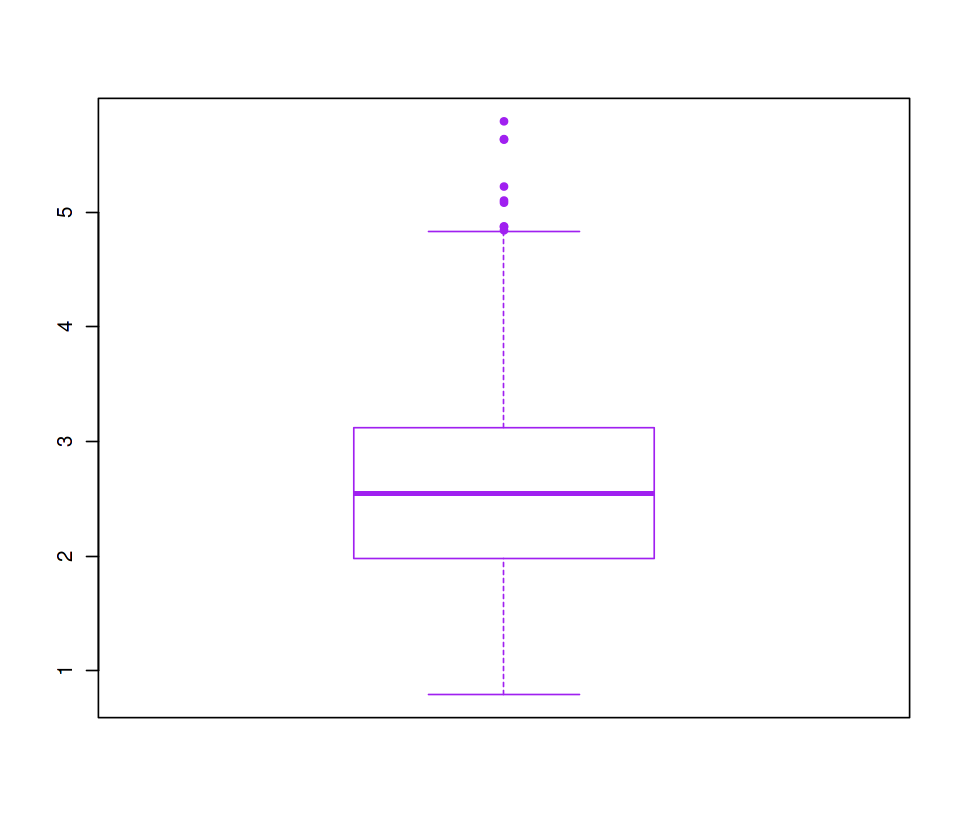

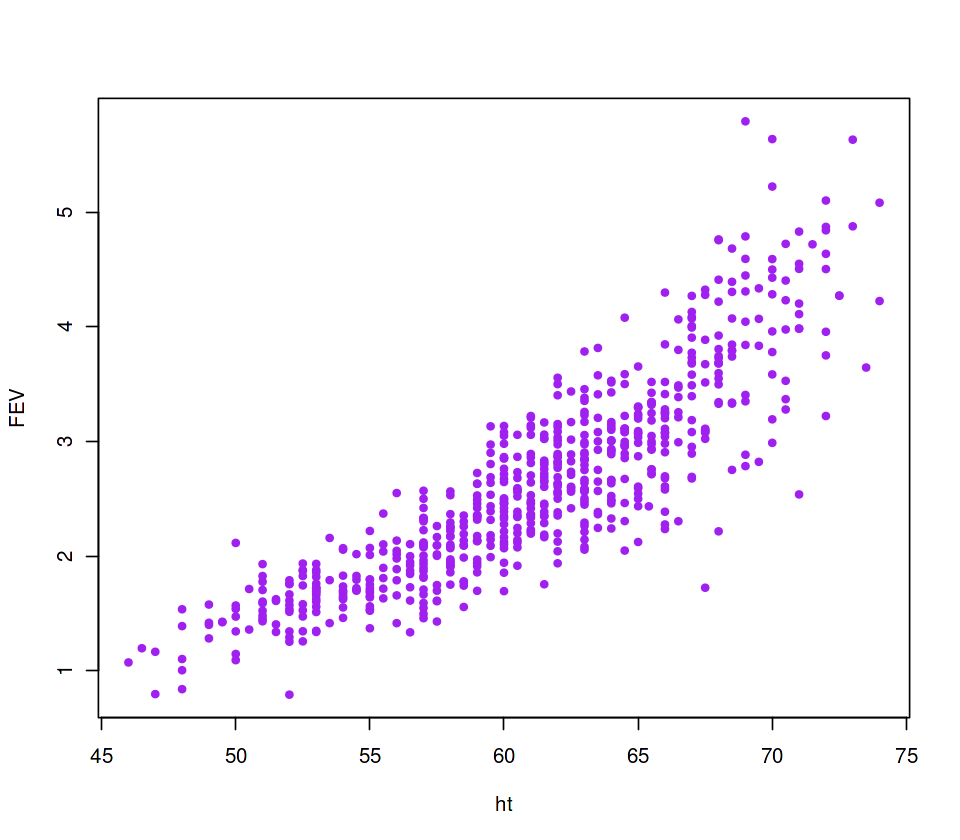

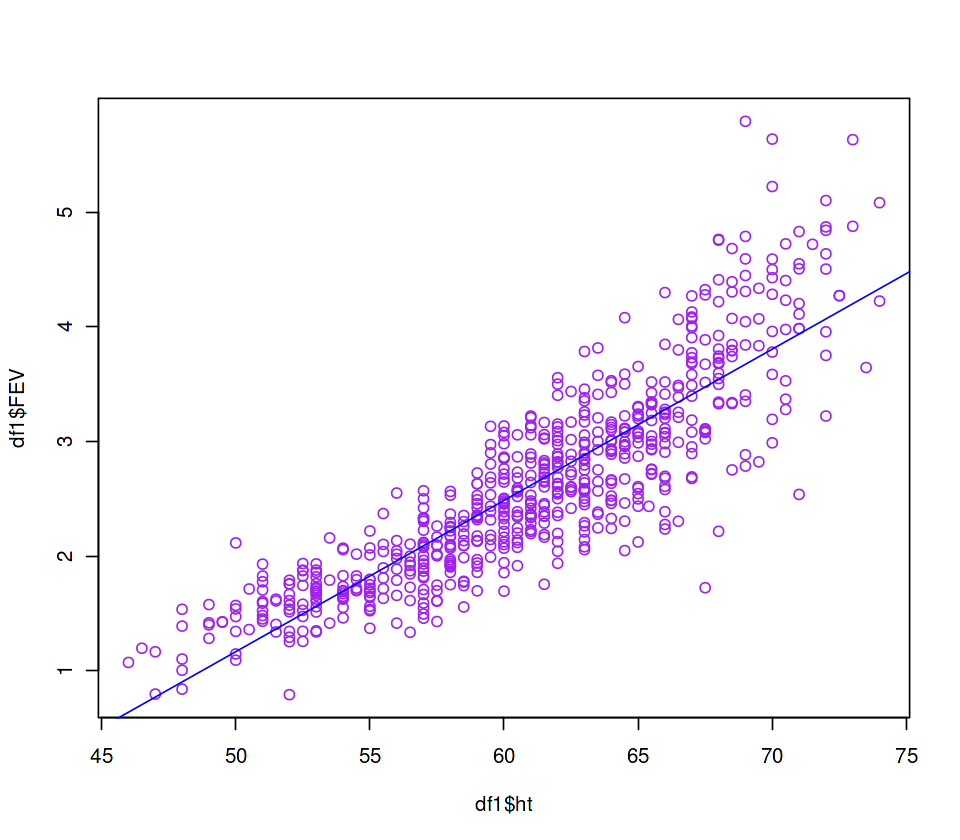

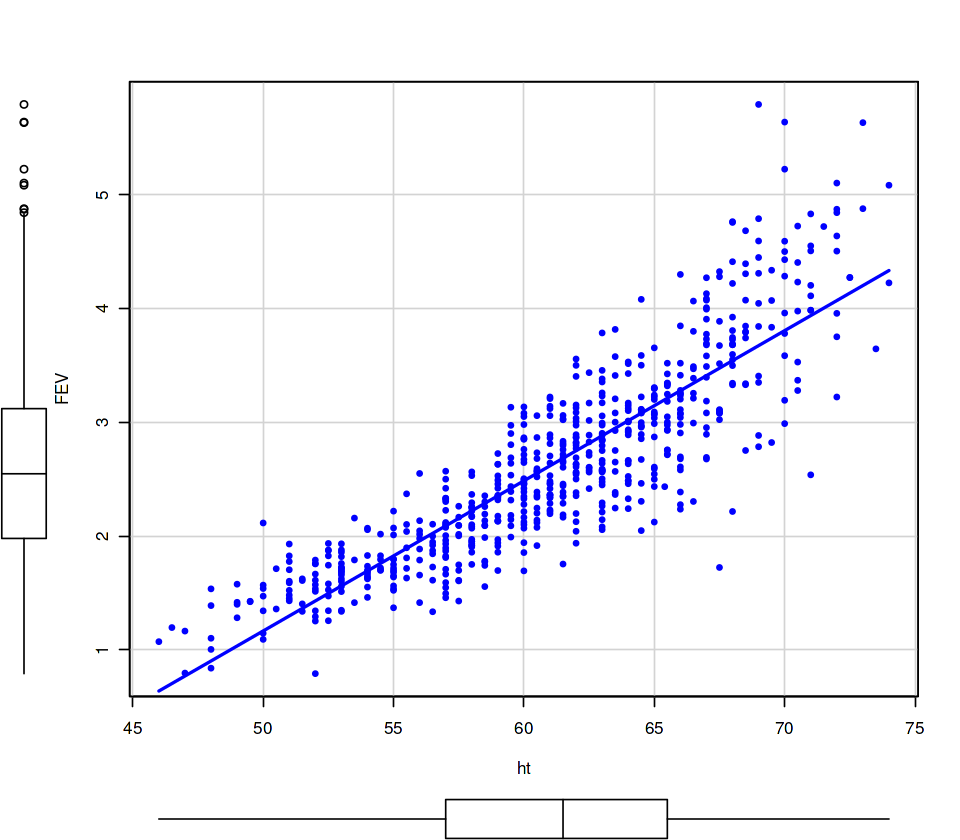

In [11]:
# korelasi
cor(df1) # semua
cor(df1$FEV, df1$ht) # khusus


# normalitas -> sedikit menjurai atas
boxplot(df1$FEV, border="purple", col="white", pch=20)

# linearitas -> cukup linear, positif, moderat
plot(FEV~ht, df1, col="purple", pch=20)
plot(df1$ht, df1$FEV, col="purple")

abline(lm(FEV~ht, df1), col="blue")

# or
scatterplot(FEV~ht, df1, smooth=F, pch=20)


Call:
lm(formula = FEV ~ ht, data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75167 -0.26619 -0.00401  0.24474  2.11936 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.432679   0.181460  -29.94   <2e-16 ***
ht           0.131976   0.002955   44.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4307 on 652 degrees of freedom
Multiple R-squared:  0.7537,	Adjusted R-squared:  0.7533 
F-statistic:  1995 on 1 and 652 DF,  p-value: < 2.2e-16


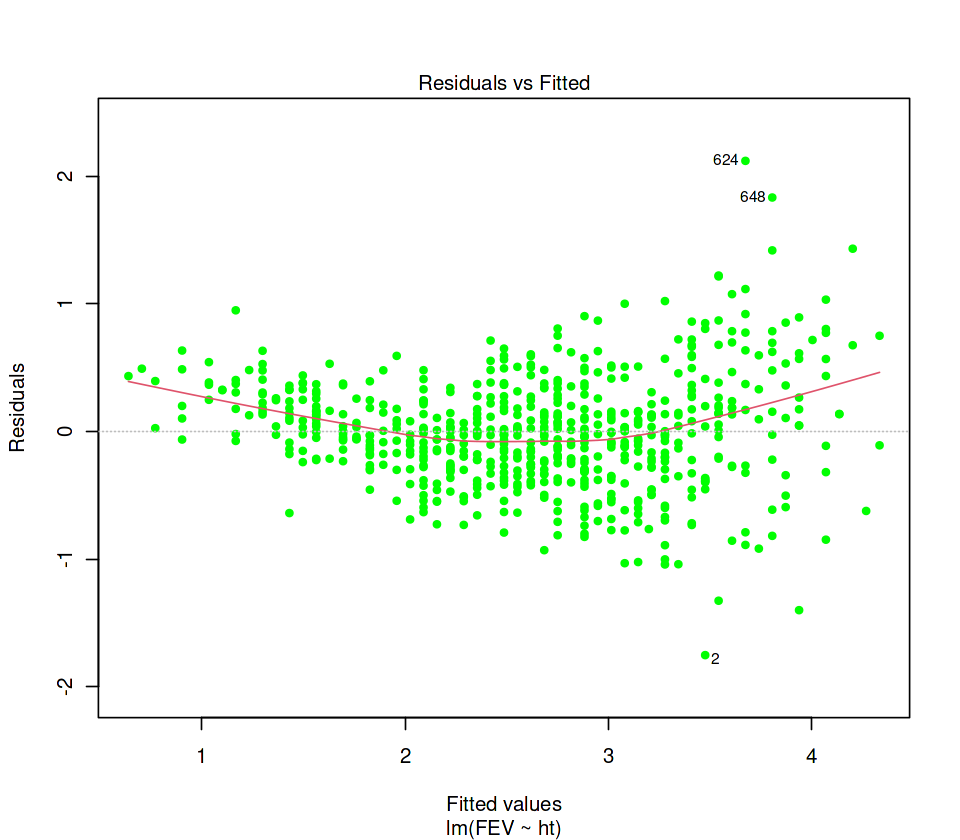

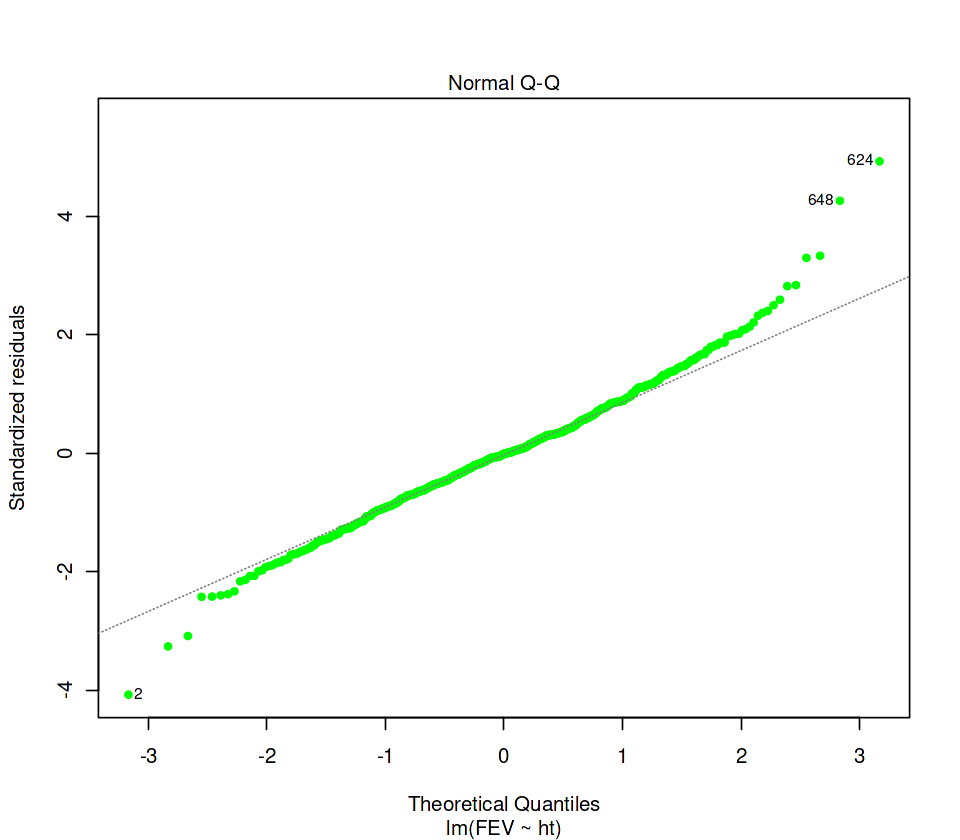

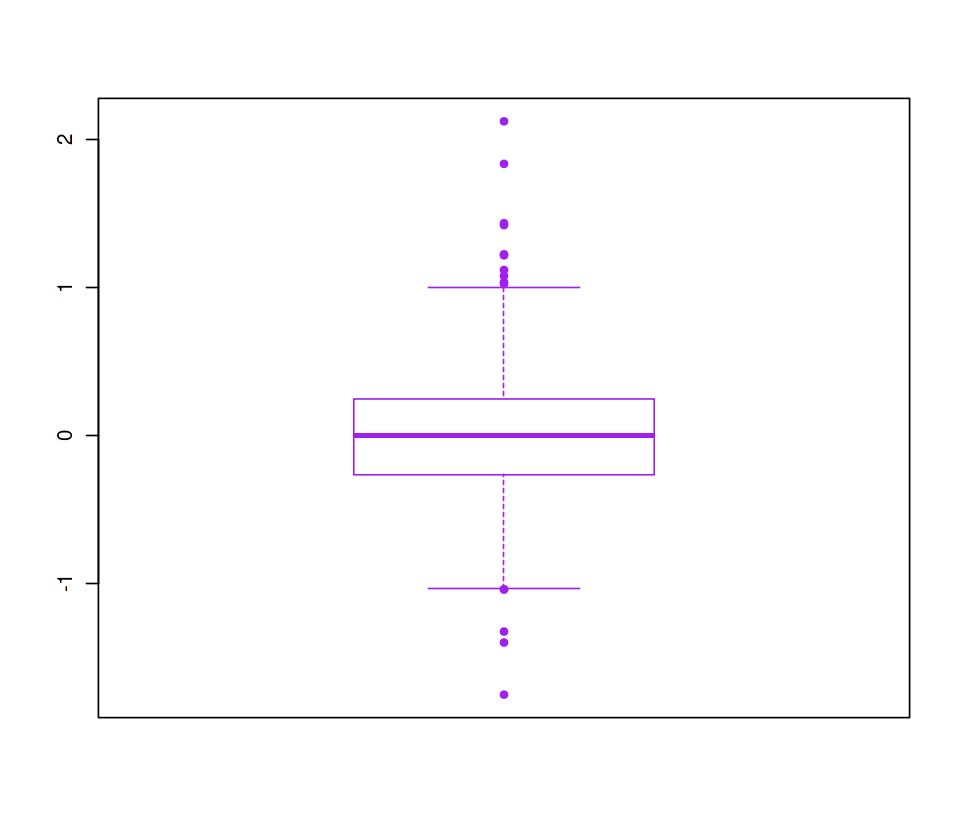

ht,pred
<dbl>,<dbl>
50,1.166100
60,2.485855
70,3.805611
80,5.125367


,age,FEV,ht,sex,smoke,predlms1
,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,9,1.708,57.0,0,0,2.089929
2,8,1.724,67.5,0,0,3.475672
3,7,1.720,54.5,0,0,1.759990
4,9,1.558,53.0,1,0,1.562026
5,9,1.895,57.0,1,0,2.089929
6,8,2.336,61.0,0,0,2.617831


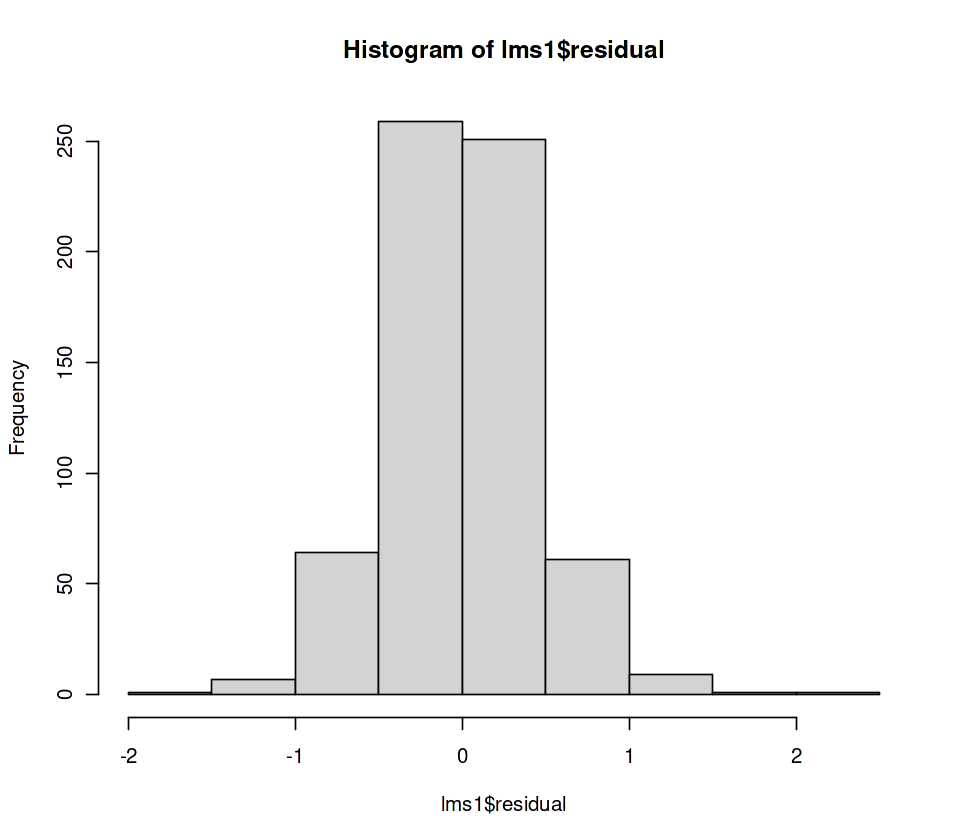

In [12]:
# model and summary
lms1 = lm(formula=FEV~ht, data=df1)
summary(lms1)

# uji diagnostik
# linearitas -> sedikit non linear
# kesamaan variansi -> hetero
plot(lms1, which=1, pch=20, col="green")

# normalitas -> cukup simetris, tapi ada outlier
plot(lms1, which=2, pch=20, col="green")
boxplot(lms1$residual, col="white", border="purple", pch=20)
hist(lms1$residual)

# bonus: predict
dfn = data.frame(ht=c(50,60,70,80))
dfn$pred = predict(lms1, dfn) # data baru
dfn

df1$predlms1 = predict(lms1) # data lama
head(df1)

lFEV~lage

,age,FEV,ht,sex,smoke,lFEV,lage
age,1.0000000,0.7564590,0.7919436,0.02914420,0.40425248,0.7718729,0.97691236
FEV,0.7564590,1.0000000,0.8681350,0.20841496,0.24542457,0.9766507,0.75510864
ht,0.7919436,0.8681350,1.0000000,0.15902905,0.28038720,0.8919682,0.82509975
sex,0.0291442,0.2084150,0.1590290,1.00000000,-0.07561166,0.1696501,0.02915678
smoke,0.4042525,0.2454246,0.2803872,-0.07561166,1.00000000,0.2444424,0.36183041
lFEV,0.7718729,0.9766507,0.8919682,0.16965012,0.24444240,1.0000000,0.79426283
lage,0.9769124,0.7551086,0.8250998,0.02915678,0.36183041,0.7942628,1.00000000


[1] 0.7942628

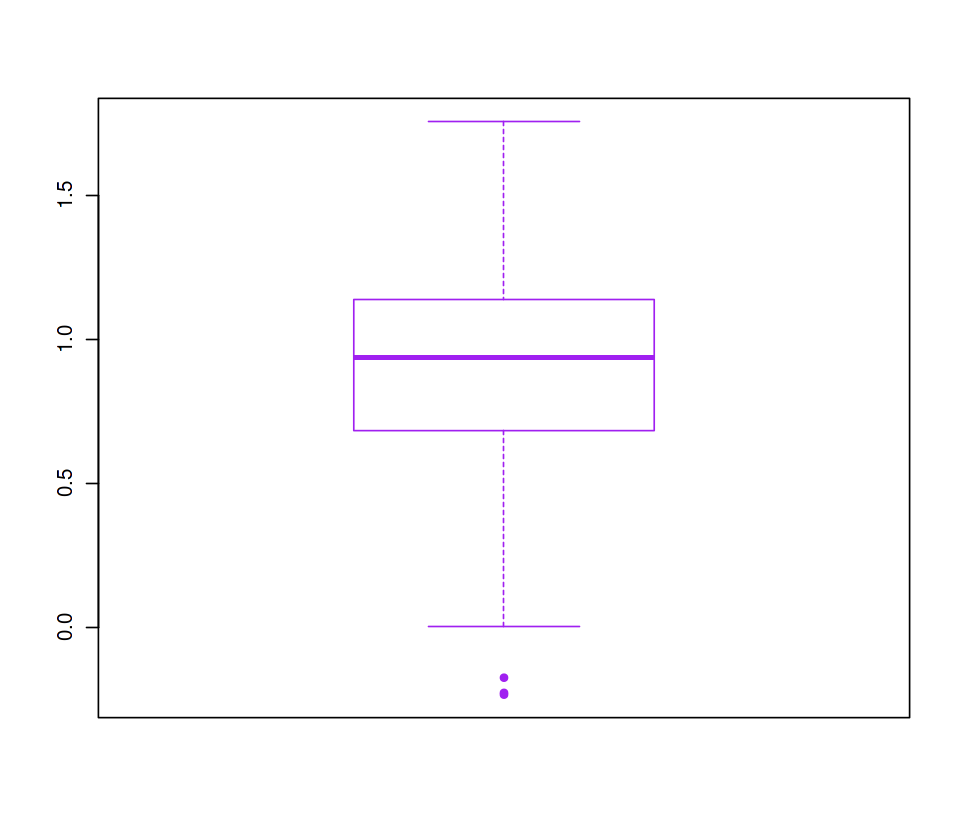

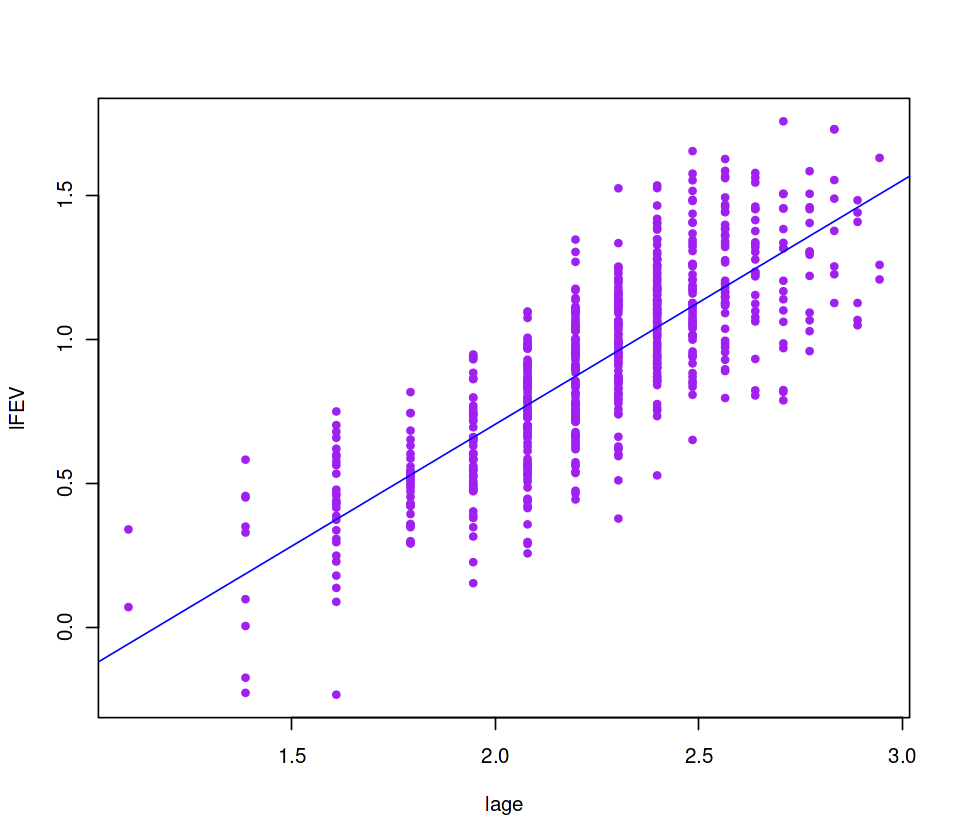


Call:
lm(formula = lFEV ~ lage, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60857 -0.13532  0.00227  0.14329  0.56348 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.98772    0.05756  -17.16   <2e-16 ***
lage         0.84615    0.02535   33.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2026 on 652 degrees of freedom
Multiple R-squared:  0.6309,	Adjusted R-squared:  0.6303 
F-statistic:  1114 on 1 and 652 DF,  p-value: < 2.2e-16


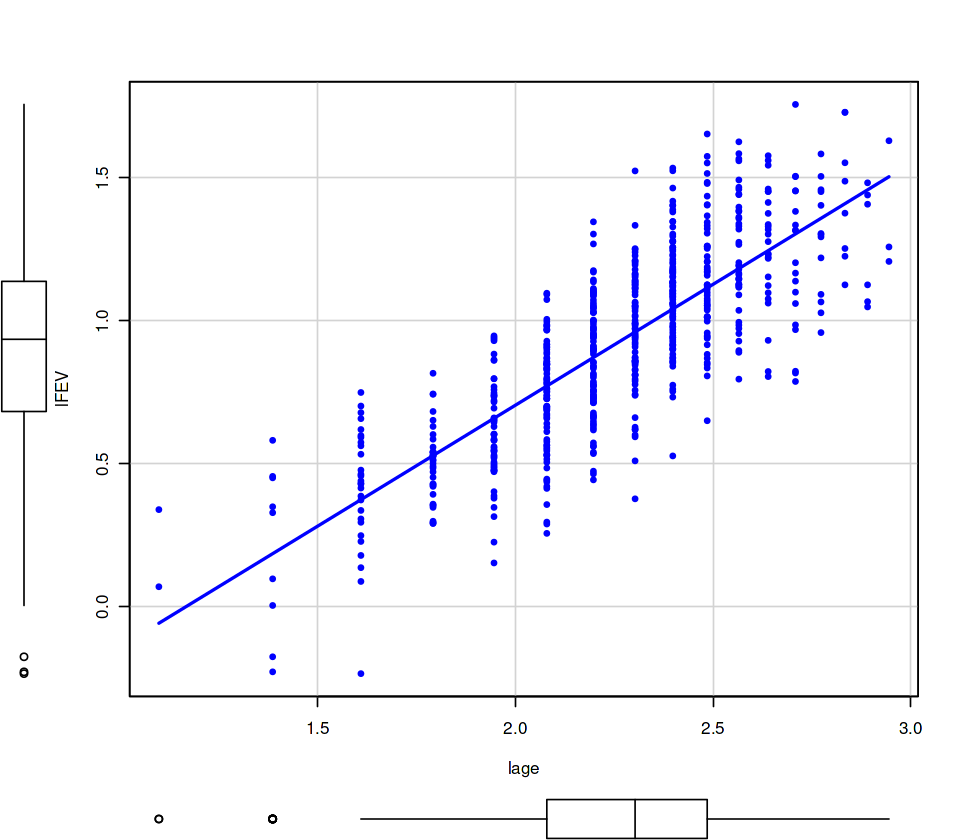

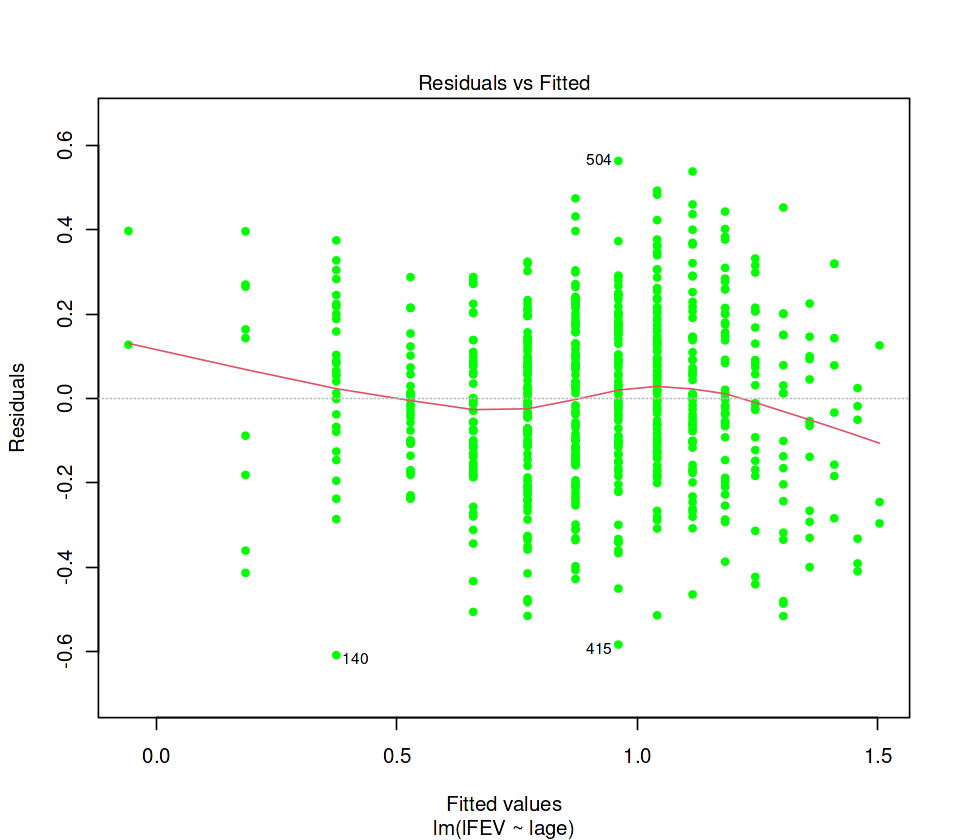

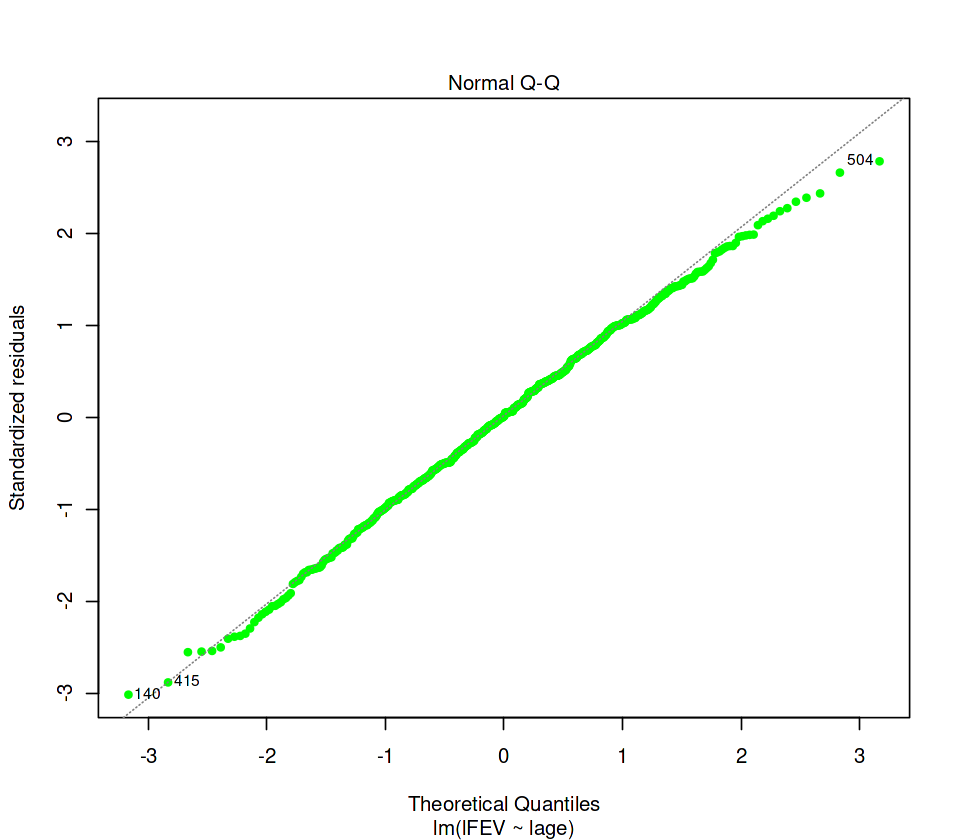

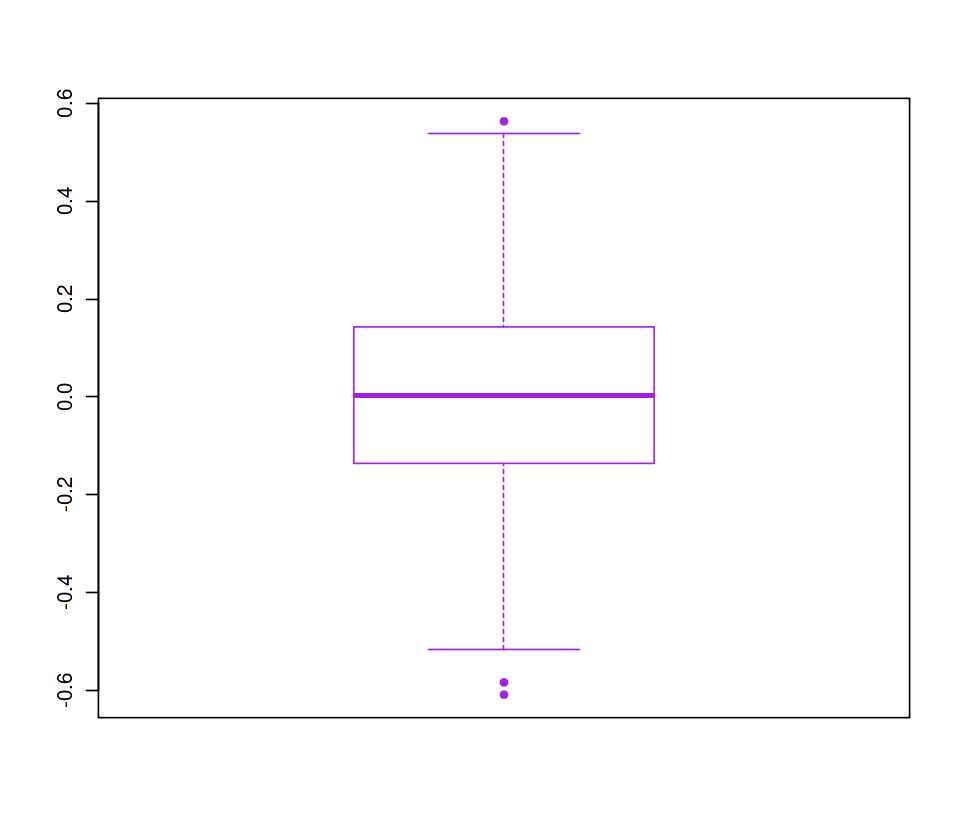

In [13]:
# transformasi
df2$lage = log(df2$age)

# korelasi
cor(df2) # semua
cor(df2$lFEV, df2$lage) # khusus


# normalitas -> sedikit menjurai bawah
boxplot(df2$lFEV, border="purple", col="white", pch=20)

# linearitas -> linear, positif, moderat
plot(lFEV~lage, df2, col="purple", pch=20)
abline(lm(lFEV~lage, df2), col="blue")

# or
scatterplot(lFEV~lage, df2, smooth=F, pch=20)


# model and summary
lms2 = lm(formula=lFEV~lage, data=df2)
summary(lms2)

# uji diagnostik
# linearitas -> mungkin ada pola, tapi tidak signif
# kesamaan variansi -> lumayan homoskes
plot(lms2, which=1, pch=20, col="green")

# normalitas -> cukup simetris, tapi ada outlier
plot(lms2, which=2, pch=20, col="green")
boxplot(lms2$residual, col="white", border="purple", pch=20)